In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family'] = "serif"
import warnings
warnings.filterwarnings('ignore')

In [3]:
def linear_fit(df):
    x = df.iloc[:,0]
    y_i = df.iloc[:,1]
    x2 = sm.add_constant(x)
    mod_uni = sm.OLS(y_i,x2).fit()

    return mod_uni

In [4]:
chicago = gp.read_file('processed_data/chicago_data_v03.shp')

In [5]:
chicago.columns

Index(['geoid10', 'commarea', 'commarea_n', 'H_a', 'H_amin', 'TOTAL POPU',
       'crime_coun', 'is_violent', 'tract_area', 'pct_park', 'n_churches',
       'n_public', 'n_private', 'n_librarie', 'percent_qu', 'number_of_',
       'kw_total', 'existing_i', 'COMMUNITY', 'PERCENT OF', 'PERCENT HO',
       'PERCENT AG', 'PER CAPITA', 'HARDSHIP I', 'PERCENT_CA', 'EBF_PFS',
       'geometry'],
      dtype='object')

In [6]:
chicago.columns = ['geoid10', 'commarea', 'commarea_n', 'H_a', 'H_amin', 'population',
       'crime_count', 'is_violent', 'tract_area', 'pct_park', 'n_churches',
       'n_public', 'n_private', 'n_libraries', 'percent_qualified', 'n_panels',
       'kw_total', 'existing_installed', 'comm_name', 'pct_crowded', 'pct_poverty',
       'pct_over65_under18', 'percap_income', 'hardship_index', 'pct_treecanopy', 'pct_energyburden','geometry']

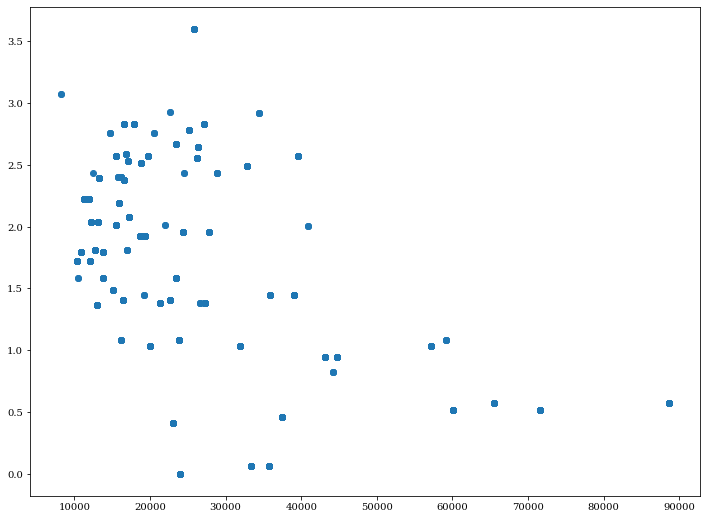

In [23]:
fig, ax = plt.subplots()
ax.scatter(chicago['percap_income'], chicago['H_amin'])

In [18]:
model = linear_fit(chicago[['hardship_index','H_amin']])

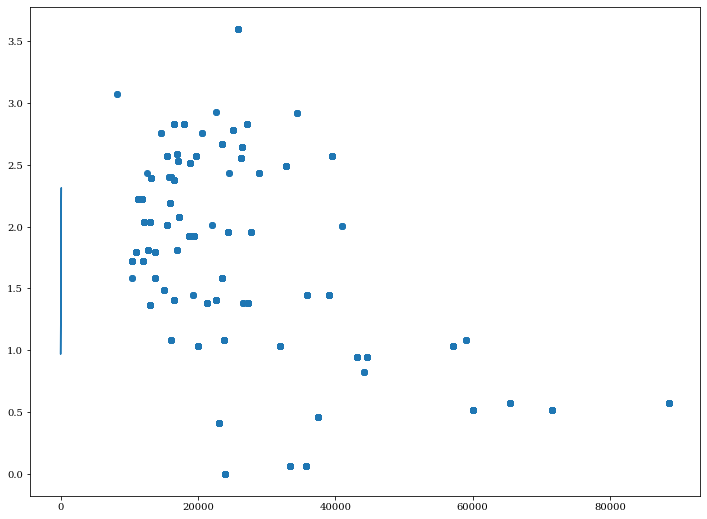

In [22]:
fig, ax = plt.subplots()
ax.scatter(chicago['percap_income'], chicago['H_amin'])
ax.plot(chicago[''],model.fittedvalues)

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 H_amin   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     305.0
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.55e-58
Time:                        08:33:13   Log-Likelihood:                -898.38
No. Observations:                 846   AIC:                             1801.
Df Residuals:                     844   BIC:                             1810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9527      0.043     21.